In [1]:
#########################################################################
# Data Exploration - COVID-19 case trend analytics
# Created by George Zhao
# Note: this project needs to checkout the git:
# https://github.com/CSSEGISandData/COVID-19.git
# and has the project structure like this example:
# <Project_parent_home>
#    COVID-19/ (generated from "git clone https://github.com/CSSEGISandData/COVID-19.git" )
#    covid-19-analytics/ (generated from "git clone  https://github.com/chainmaporg/covid-19-analytics.git" )
# 
import pandas as pd
from IPython.display import display, HTML
import datetime
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import Markdown
warnings.filterwarnings('ignore')




In [2]:
backdays = 10

In [3]:
## Utilities for the data engineering
##


def barchart(df, x_fld, y_fld, xlabel, ylabel, chartname):
    ax = sns.barplot(x=x_fld, y=y_fld, data=df,  palette=["lightblue"])   
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_title(chartname)
    #for p in ax.patches:
    #    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    plt.show()

def barchart2(df, x_fld, y_fld, huef, xlabel, ylabel, chartname):
    ax = sns.barplot(x=x_fld, y=y_fld, hue=huef, data=df, palette=["orange", "teal"]) 
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_title(chartname)
    #for p in ax.patches:
    #    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    plt.show()

def barchart2text(color, df, x_fld, y_fld, huef, xlabel, ylabel, chartname):
    ax = sns.barplot(x=x_fld, y=y_fld, hue=huef, data=df, palette=[color, "teal"]) 
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_title(chartname)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    plt.show()

def chart(daily_df, fld):
    t=daily_df.iloc[0]["region"]
    if(fld.find("_ratio")>0):
        ax = sns.lineplot(x="day", y=fld, data=daily_df)
    else:
        ax = sns.barplot(x="day", y=fld, data=daily_df, palette=["lightblue"])
    if(fld.find("_growth")>0):
        ylabel = "daily growth (%)"
    else:
        ylabel = "daily case count"
    
    ax.set(xlabel='Date ('+t+")", ylabel=ylabel)
    ax.set_title(fld+' number')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.xticks(rotation='vertical')

    plt.tight_layout()
    plt.show()

def linechart(daily_df, fld):
    t=daily_df.iloc[0]["region"]
    ax = sns.lineplot(x="day", y=fld, data=daily_df)
    if(fld.find("_growth")>0):
        ylabel = "daily growth (%)"
    else:
        ylabel = "daily case count"
    
    ax.set(xlabel='Date ('+t+")", ylabel=ylabel)
    ax.set_title(fld+' case')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.xticks(rotation='vertical')

    plt.tight_layout()
    plt.show()
    
def getDfFromLocal(filename):
        fullpath=filename
        df = pd.read_csv(fullpath, encoding="utf-8")
        return df
    
def printList(df):
    i=1
    for index, row in df.iterrows():
        print(i, row)
        i=i+1

def genDayList(days, off):
    now = datetime.datetime.now()
    daylist=[]
    for i in range(days):
        yesterday = date.today() - timedelta(days=(days-i+off))
        str = yesterday.strftime("%m-%d-%Y")
        daylist.append(str)
    return daylist


def getCountry(name):
    if(name=="US"):
        return("United States")
    else:
        return name
    
def getCountryPopulation(pop_df, country):
    country = getCountry(country)
    if(country.lower()=="china"):
        return 58.5*1000000
    for index, row in pop_df.iterrows():
        c=row["country"]
        c1=c.lower()
        c2=country.lower()

        if(c1.find(c2)>=0):
            return(row["population"])


In [4]:

## Data Process and data transforming
#
def findCountry():
    df = getDFByDay("03-27-2020")
    return df["Country_Region"].unique()


    
def findState():
    df = getDFByDay("03-27-2020")
    df = df[df["Country_Region"]=="US"]
    list = df["Province_State"].unique()
    #print(list)
    return list


dfmap={}
def getDFByDay(day):
    global dfmap
    if(day in dfmap.keys()):
        return dfmap[day]
    
    file=day+".csv"
    filepath = "../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"+file
    df = getDfFromLocal(filepath)
    dfmap[day] = df
    return df


#output a list of cases by the day and tbe state name
def getCasesByState(day, state):
    df = getDFByDay(day)
    new_df = df[df['Province_State'].apply(lambda x: state == x)]
    return new_df

#Cover country/state/couty
def getTotalByRegion(day, region, isCountry):
    df = getDFByDay(day)
    if(region.find("-")>0):
        strs=region.split("-")
        county=strs[0]
        state=strs[1]
        df = df[df['Province_State'].apply(lambda x: state == x)]
        df = df[df['Admin2'].apply(lambda x: county == x)]
    elif isCountry:
        df = df[df['Country_Region'].apply(lambda x: region == x)]
    else:
        df = df[df['Province_State'].apply(lambda x: region == x)]
              
    return df




def getCasesByCounty(day, county, state):
    df = getCasesByState(day, state)
    new_df = df[df['Admin2'].apply(lambda x: county == x)]
    return new_df



def findCounty(state):
    df = getDFByDay("03-27-2020")
    df = df[df["Province_State"]==state]
    print(df.Admin2.unique())


def findTrendSpeedByCounty(day_list, county, state):
    region = county+"-"+state
    return findTrendSpeedByRegion(day_list, region, False)

def findTrendSpeedByState(day_list, state):
    return findTrendSpeedByRegion(day_list, state, False)

def findTrendByCountry(day_list, country):
    return findTrendSpeedByRegion(day_list, country, True)

def findTrendSpeedByCountry(day_list, country):
    return findTrendSpeedByRegion(day_list, country, True)


def findTrendSpeedByRegion(day_list, region, isCountry):
    
    d = {'region': [], 'day': [], 'confirmed': [],'confirmed_growth': [], 'death':[],'death_growth': [], 'recovered': [], 'recovered_ratio': [], 'death_ratio':[]}
    df = pd.DataFrame(d)

    i=0
    c0=0
    d0=0
    r0=0
    for day in day_list:
        day_df = getTotalByRegion(day, region, isCountry)
        if (day_df.shape[0]>0):
            c1 = day_df["Confirmed"].sum()
            d1 = day_df["Deaths"].sum()
            r1 = day_df["Recovered"].sum()
            dc1 = d1*1.0/c1
            
            if(c0>0):
                cc = (c1-c0)*100.0/c0
            else:
                cc = 0
                
            if(d0>0):
                dd = (d1-d0)*100.0/d0
            else:
                dd = 0               
 
            if(r0>0):
                rr = (r1)/c1
            else:
                rr = 0     
                
            new_row = [{"region":region, "day":day[:5], "confirmed":c1, 'confirmed_growth':cc, "death":d1, 'death_growth':dd, 'recovered':r1, 'recovered_ratio':rr, 'death_ratio':dc1}]
            c0=c1
            d0=d1
            r0=r1
        else:
            new_row = [{"region":region, "day":day[:5], "confirmed":0, 'confirmed_growth':0,   "death":0,  'death_growth':0, 'recovered':0, 'recovered_ratio':0, 'death_ratio':0}]
          
        df = df.append(new_row, ignore_index=True)
    return df  

    

In [5]:
def getTotalByRegion(day, region, isCountry):
    df = getDFByDay(day)
    if(region.find("-")>0):
        strs=region.split("-")
        county=strs[0]
        state=strs[1]
        df = df[df['Province_State'].apply(lambda x: state == x)]
        df = df[df['Admin2'].apply(lambda x: county == x)]
    elif isCountry:
        df = df[df['Country_Region'].apply(lambda x: region == x)]
    else:
        df = df[df['Province_State'].apply(lambda x: region == x)]
              
    return df



In [6]:
##Reporting and business layer
#

def htmlRecStateStatus(rec):  
    text = "<hr><center>"+\
           "<table border='1' style='background-color:white'>"+\
           "<tr>"+"<td><b>region</b></td>"+"<td>"+rec["region"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>day</b></td>"+"<td>"+rec["day"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>confirmed</b></td></td>"+"<td>"+rec["confirmed"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>death</b></td>"+"<td>"+rec["death"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>confirmed_growth</b></td>"+"<td>"+rec["confirmed_growth"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>death_growth</b></td>"+"<td>"+rec["death_growth"]+"</td>"+"</tr> </table>"+\
           "</center>"
    html = HTML(text)    
    return html

def htmlRecCountryStatus(rec):  
    text = "<hr><center>"+\
           "<table border='1' style='background-color:white'>"+\
           "<tr>"+"<td><b>region</b></td>"+"<td>"+rec["region"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>day</b></td>"+"<td>"+rec["day"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>confirmed</b></td></td>"+"<td>"+rec["confirmed"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>death</b></td>"+"<td>"+rec["death"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>confirmed_growth</b></td>"+"<td>"+rec["confirmed_growth"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>death_growth</b></td>"+"<td>"+rec["death_growth"]+"</td>"+"</tr>"+\
           "<tr>"+"<td><b>recovered</b></td>"+"<td>"+rec["recovered"]+"</td>"+"</tr> </table>"+\
           "</center>"
    html = HTML(text)    
    return html


def chartGrowthDeath(df, title):
    #region	day	confirmed	confirmed_growth	death	death_growth	recovered	recovered_ratio	death_ratio
    today_rec = df[['region', 'day', 'confirmed', 'confirmed_growth', 'death', 'death_growth']].iloc[-1]
    pre_rec = df[['region', 'day', 'confirmed', 'confirmed_growth', 'death', 'death_growth']].iloc[-2]
     
    c_i = today_rec["confirmed_growth"] - pre_rec["confirmed_growth"]
    d_i = today_rec["death_growth"] - pre_rec["death_growth"]
    
    
    today_rec["confirmed"]= '%.0f' % (today_rec["confirmed"]) + " (was:"+ '%.0f' % pre_rec["confirmed"]+")"
    today_rec["death"] = '%.0f' % today_rec["death"] + " (was:"+ '%.0f' %pre_rec["death"]+")"
    today_rec["confirmed_growth"] = '%.2f' % today_rec["confirmed_growth"] + "% (was:"+ '%.2f' %pre_rec["confirmed_growth"]+"%)"
    today_rec["death_growth"] = '%.2f' % today_rec["death_growth"] + "% (was:"+ '%.2f' %pre_rec["death_growth"]+"%)"
    display(htmlRecStateStatus(today_rec))

    numx = pd.melt(df, id_vars='day',
                         value_vars=["confirmed_growth", "death_growth"],
                         var_name="type", value_name="nums")
    score=0
    gs=0
    if(c_i<=0 and d_i<=0):
        text="GREEN"
        display (Markdown('<center><span style="color: green">'+text+'</span></center>'))
        gs=gs+1
    elif(c_i<=0 and d_i>0):
        text="ORANGE"
        score=1
        display (Markdown('<center><span style="color: orange">'+text+'</span></center>'))
    else:
        text="RED"
        score=2
        display (Markdown('<center><span style="color: red">'+text+'</span></center>'))

    barchart2text("orange", numx, "day","nums", "type", "Date", "Counts", title+":Confirmed Case/Death Growth (%)")
    return (score, gs)

def chartConfirmedRecovered(df, title):
    today_rec = df[['region', 'day', 'confirmed', 'confirmed_growth', 'death', 'death_growth', 'recovered']].iloc[-1]
    pre_rec = df[['region', 'day', 'confirmed', 'confirmed_growth', 'death', 'death_growth', 'recovered']].iloc[-2]
     
    c_i = today_rec["confirmed_growth"] - pre_rec["confirmed_growth"]
    d_i = today_rec["death_growth"] - pre_rec["death_growth"]
    
    
    today_rec["confirmed"]= '%.0f' % (today_rec["confirmed"]) + " (was:"+ '%.0f' % pre_rec["confirmed"]+")"
    today_rec["death"] = '%.0f' % today_rec["death"] + " (was:"+ '%.0f' %pre_rec["death"]+")"
    today_rec["confirmed_growth"] = '%.2f' % today_rec["confirmed_growth"] + "% (was:"+ '%.2f' %pre_rec["confirmed_growth"]+"%)"
    today_rec["death_growth"] = '%.2f' % today_rec["death_growth"] + "% (was:"+ '%.2f' %pre_rec["death_growth"]+"%)"
    today_rec["recovered"]= '%.0f' % (today_rec["recovered"]) + " (was:"+ '%.0f' % pre_rec["recovered"]+")"

    display(htmlRecCountryStatus(today_rec))

    numx = pd.melt(df, id_vars='day',
                         value_vars=["confirmed_growth", "death_growth"],
                         var_name="type", value_name="nums")
    score=0
    gs=0
    if(c_i<=0 and d_i<=0):
        text="GREEN"
        gs=gs+1
        display (Markdown('<center><span style="color: green">'+text+'</span></center>'))
    elif(c_i<=0 and d_i>0):
        text="ORANGE"
        display (Markdown('<center><span style="color: orange">'+text+'</span></center>'))
        score=1
    else:
        text="RED"
        display (Markdown('<center><span style="color: red">'+text+'</span></center>'))
        score=2


    numx = pd.melt(df, id_vars='day',
                         value_vars=["confirmed", "recovered"],
                         var_name="type", value_name="nums")

    barchart2(numx, "day","nums", "type", "Date", "Counts", title+":Confirmed Case/Recovered Growth (Count)")
    return (score, gs)

def chartRegionAll(df1):
    chart(df1, "confirmed")
    chart(df1, "death")
    chart(df1, "confirmed_growth")
    chart(df1, "recovered")
    chart(df1, "recovered_ratio")
    chart(df1, "death_ratio")

def chartRegion(df1):
    chart(df1, "confirmed")
    chart(df1, "death")
    chart(df1, "confirmed_growth")
    chart(df1, "death_ratio")


def chartRegion_C_R(title, df1):
    return chartConfirmedRecovered(df1, title)

def chartRegion_C_D_Growth(title, df1):
    return chartGrowthDeath(df1, title)

    

def report_local():
    day_list = genDayList(backdays, 0)
    df1= findTrendSpeedByCounty(day_list, "Washington", "Oregon")
    chartRegion(df1)
    latest = day_list[len(day_list)-1]
    df1= getCasesByState(day_list[6], "Oregon")
    df1 =df1[["Admin2", "Province_State", "Confirmed", "Deaths"]]
    df1 = df1.sort_values(by=['Confirmed'], ascending=False) 
    df1= findTrendSpeedByState(day_list,"Oregon")
    chartRegion(df1)
    
def report_friend():
    day_list = genDayList(backdays, 0)
    df1= findTrendSpeedByCounty(day_list, "Fairfax", "Virginia")
    chartRegion(df1)
    latest = day_list[len(day_list)-1]
    df1= getCasesByState(day_list[6], "Virginia")
    df1 =df1[["Admin2", "Province_State", "Confirmed", "Deaths"]]
    df1 = df1.sort_values(by=['Confirmed'], ascending=False) 
    df1= findTrendSpeedByState(day_list,"Virginia")
    chartRegion(df1)


def report_SC():
    day_list = genDayList(backdays, 0)
    df1= findTrendSpeedByCounty(day_list, "Santa Clara", "California")
    chartRegion(df1)
    latest = day_list[len(day_list)-1]
    df1= getCasesByState(day_list[6], "California")
    df1 =df1[["Admin2", "Province_State", "Confirmed", "Deaths"]]
    df1 = df1.sort_values(by=['Confirmed'], ascending=False) 
    df1= findTrendSpeedByState(day_list,"California")
    chartRegion(df1)


def report_NY():
    day_list = genDayList(backdays, 0)
    df = findTrendSpeedByState(day_list, "New York")
    chartRegion(df)
def report_US():
    day_list = genDayList(backdays, 0)
    df = findTrendSpeedByCountry(day_list, "US")
    chartRegionAll(df)

def report_top_growth():
    (topn_confirmed,topn_growth) = get_topn_world(20)
    clist = topn_confirmed['region'].tolist()
    score = 0
    gs = 0 
    for cty in clist:
        day_list = genDayList(backdays, 0)
        df = findTrendSpeedByCountry(day_list, cty)
        (s1, g1) = chartRegion_C_R(cty, df)
        score = score + s1
        gs = gs + g1
    display(HTML("<h1>======Total top-20 country score:"+str(score)+" total greens:"+str(gs)+"</h1>"))

def report_top_state():
    (topn_confirmed,topn_growth) = get_topn_state(20)
    clist = topn_confirmed['region'].tolist()
    score = 0
    gs = 0 
    for state in clist:
        day_list = genDayList(backdays, 0)
        df = findTrendSpeedByState(day_list, state)
        (s1, g1) = chartRegion_C_D_Growth(state, df)
        score = score + s1
        gs = gs + g1

    display(HTML("<h1>======Total top-20 state score:"+str(score)+" total greens:"+str(gs)+"</h1>"))


    
def report_world():
    day_list = genDayList(backdays, 0)
    clist = findCountry()
    for cty in clist: 
        if(cty=="China" or cty=="Korea, South" or cty=="Taiwan*"):
            df = findTrendSpeedByCountry(day_list, cty)
            #chartRegionAll(df)
            chartGrowthDeath(df)
            #k1 = df.iloc[len(day_list)-1]["confirmed_growth"]

def mydisplay(title, df):
    pd.set_option('display.width', -1)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.max_colwidth', -1)
    display(HTML("<span style='color:red'><h2>"+title+"</h2> </span>  "))
    display(HTML("<center>"+df.to_html()+"</center>"))

def get_topn_world(n):
    day_list = genDayList(backdays, 0)
    clist = findCountry()
    d = {'region': [], 'confirmed': [],'confirmed_growth': [], 'death':[], 'recovered': [],'recovered_ratio': []}
    world_df= pd.DataFrame(d)
    for cty in clist:
        if(True):
            df = findTrendSpeedByCountry(day_list, cty)
            confirmed = df.iloc[len(day_list)-1]["confirmed"]
            confirmed_growth = df.iloc[len(day_list)-1]["confirmed_growth"]
            death = df.iloc[len(day_list)-1]["death"] 
            recovered=df.iloc[len(day_list)-1]["recovered"]
            recovered_ratio = recovered*1.0/confirmed
            new_row = [{"region":cty, "confirmed":confirmed, 'confirmed_growth':confirmed_growth,   'death':death, 'recovered':recovered, 'recovered_ratio': recovered_ratio}]       
            world_df = world_df.append(new_row)
            
    topn_confirmed = world_df.sort_values(by=['confirmed'], ascending=False)[:n]
    topn_growth = topn_confirmed.sort_values(by=['confirmed_growth'], ascending=False)[:n]
    return (topn_confirmed, topn_growth)


def get_topn_state(n):
    day_list = genDayList(backdays, 0)
    slist = findState()
    d = {'region': [], 'confirmed': [],'confirmed_growth': [], 'death':[]}
    state_df= pd.DataFrame(d)
    for state in slist:
        if(True):
            df = findTrendSpeedByState(day_list, state)
            confirmed = df.iloc[len(day_list)-1]["confirmed"]
            confirmed_growth = df.iloc[len(day_list)-1]["confirmed_growth"]
            death = df.iloc[len(day_list)-1]["death"] 
            new_row = [{"region":state, "confirmed":confirmed, 'confirmed_growth':confirmed_growth,   'death':death}]       
            state_df = state_df.append(new_row)
            
    topn_confirmed = state_df.sort_values(by=['confirmed'], ascending=False)[:n]
    topn_growth = topn_confirmed.sort_values(by=['confirmed_growth'], ascending=False)[:n]
    return (topn_confirmed, topn_growth)



    
def top_world():
    (topn_confirmed, topn_growth) = get_topn_world(20)
    mydisplay("Top confirmed case countries", topn_confirmed)
    

def all_run(idx):
    if(idx==0):
        report_top_growth()
        
    if(idx==1):
        top_world()
    
    if(idx==7):
        report_US()
        #print("-------US DONE-----")
        
    if(idx==2):
        report_local()
        #print("-------LOCAL DONE-----")
    if(idx==3):
        report_NY()
        #print("-------NY DONE-----")
    if(idx==4):
        report_SC()
        #print("-------SC DONE-----")
    if(idx==5):
        report_world()
        #print("-------World DONE-----")
    if(idx==6):
        top_world()
        
    if(idx==8):
        (cdf, gdf) = get_topn_world(20)
        display(cdf.head(20))
    if(idx==9):
        report_friend()
    if(idx==10):
        report_top_state()
        



<center><h1>Hope Rising Report (COVID-19 04/13 Update)</h1>
    (<b>Score range</b>: 0-40 and 0 is the best, 40 is the worst)
<br>
    (<b>Status</b>: green means case/death growth down from the day before)
</center>
<br>
<center> <img width="200" src="./hope.jpg"/></center>
<br>
    <table border="1"> 
            <tr><th> Item </th> <th> Today </th> <th> Yesterday </th></tr>
    <tr><td> Top-20 Country Trend Score </td> <th> 16 </th> <td> 18 </td></tr>
    <tr><td> Top-20 US State Trend Score </td> <th> 22 </th> <td> 14 </td></tr>
            <tr><td> Top-20 Country Green Count</td> <th> 10 </th> <td> 10 </td></tr>
            <tr><td> Top-20 US State Green Count</td> <th> 5 </th> <td> 12 </td></tr>
    </table>
<br>



<h2> Looking for Hope (score 0) </h2>
<ul>
    <li> Sum of all region (country or state) scores
    <li> <font color="green"> GREEN </font> - Region score=0: Decrease on both new daily case and daily death 
    <li> <font color="orange"> ORANGE </font> - Region score=1: Region score=1: Decrease on daily case
    <li> <font color="red"> RED </font> - Region score=2: Still increasing on new daily case and death numbers
</ul>


<h2>This reports covered the below cases</h2>
<ul>
    <li><b>Confirmed cases</b> - The total number is the key metrics, and its daily growth is monitored
    <li><b>Number of Death cases</b> - Death can reflect to the status of Virus infection and medical capability
    <li><b>Recoverd case</b> - Good news come from this number
    <li><b>Recoverd ratio</b> - recovered/confirmed (0..1)
    <li><b>Confirmed growth (%) </b> - The daily growth of the confirmed number (0..100)
    <li><b>Death ratio</b> - The death ratio against the confirmed number (0..1)
</ul>

<h2>How to read the report:</h2>

<ul>
    <li> Confirmed number - confirmed cases, watch the growth number
    <li> Death numer - watch the ratio and trend
    <li> Recovered number - see the ratio compaering to comnfirmed number
    <li> Confirmed growth - see the trend of today's growth v.s. the history
    <li> Death ratio - see the growth
</ul>

<h2> Overview of global top-20 country situation on COVID-19</h2>


In [7]:
display(HTML("""
<style>
.output {
    align-items: center;
    text-align: center;
}
</style>
"""))


all_run(1)

,region,confirmed,confirmed_growth,death,recovered,recovered_ratio
0,US,580619.0,4.557070,23529.0,43482.0,0.074889
0,Spain,170099.0,1.958869,17756.0,64727.0,0.380525
0,Italy,159516.0,2.016462,20465.0,35435.0,0.222141
0,France,137875.0,3.145807,14986.0,28001.0,0.203090
0,Germany,130072.0,1.734791,3194.0,64300.0,0.494342
0,United Kingdom,89570.0,5.121705,11347.0,304.0,0.003394
0,China,83213.0,0.095027,3345.0,78039.0,0.937822
0,Iran,73303.0,2.255671,4585.0,45983.0,0.627300
0,Turkey,61049.0,7.186249,1296.0,3957.0,0.064817
0,Belgium,30589.0,3.177387,3903.0,6707.0,0.219262


<h2>Analytics on top-20 countries with most confirmed case </h2>

region,US
day,04-13
confirmed,580619 (was:555313)
death,23529 (was:22020)
confirmed_growth,4.56% (was:5.49%)
death_growth,6.85% (was:7.61%)
recovered,43482 (was:32988)


<center><span style="color: green">GREEN</span></center>

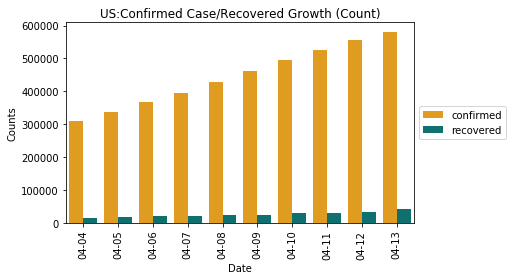

region,Spain
day,04-13
confirmed,170099 (was:166831)
death,17756 (was:17209)
confirmed_growth,1.96% (was:2.33%)
death_growth,3.18% (was:3.63%)
recovered,64727 (was:62391)


<center><span style="color: green">GREEN</span></center>

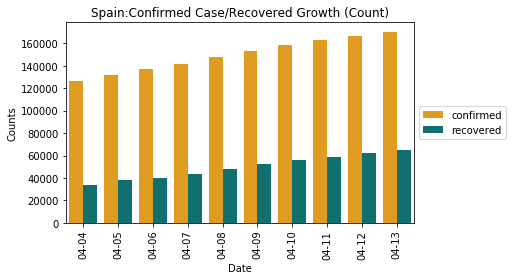

region,Italy
day,04-13
confirmed,159516 (was:156363)
death,20465 (was:19899)
confirmed_growth,2.02% (was:2.69%)
death_growth,2.84% (was:2.21%)
recovered,35435 (was:34211)


<center><span style="color: orange">ORANGE</span></center>

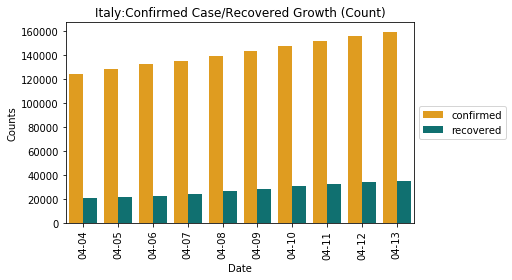

region,France
day,04-13
confirmed,137875 (was:133670)
death,14986 (was:14412)
confirmed_growth,3.15% (was:2.25%)
death_growth,3.98% (was:4.05%)
recovered,28001 (was:27469)


<center><span style="color: red">RED</span></center>

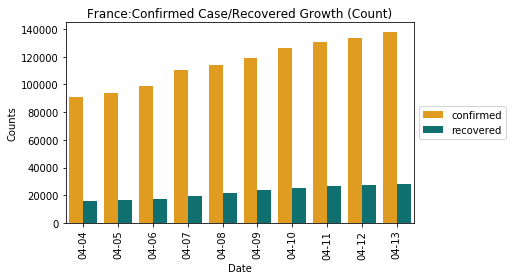

region,Germany
day,04-13
confirmed,130072 (was:127854)
death,3194 (was:3022)
confirmed_growth,1.73% (was:2.36%)
death_growth,5.69% (was:10.45%)
recovered,64300 (was:60300)


<center><span style="color: green">GREEN</span></center>

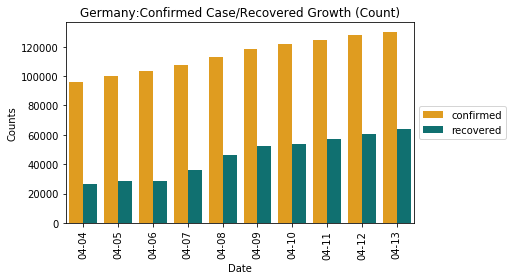

region,United Kingdom
day,04-13
confirmed,89570 (was:85206)
death,11347 (was:10629)
confirmed_growth,5.12% (was:6.68%)
death_growth,6.76% (was:7.45%)
recovered,304 (was:626)


<center><span style="color: green">GREEN</span></center>

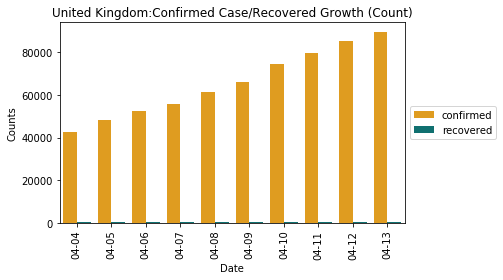

region,China
day,04-13
confirmed,83213 (was:83134)
death,3345 (was:3343)
confirmed_growth,0.10% (was:0.14%)
death_growth,0.06% (was:0.00%)
recovered,78039 (was:77956)


<center><span style="color: orange">ORANGE</span></center>

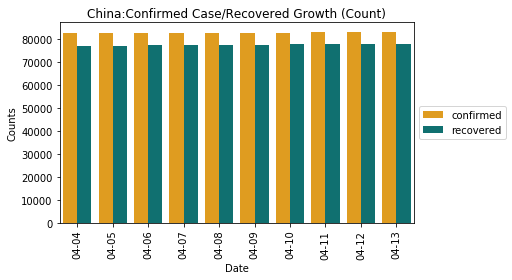

region,Iran
day,04-13
confirmed,73303 (was:71686)
death,4585 (was:4474)
confirmed_growth,2.26% (was:2.37%)
death_growth,2.48% (was:2.69%)
recovered,45983 (was:43894)


<center><span style="color: green">GREEN</span></center>

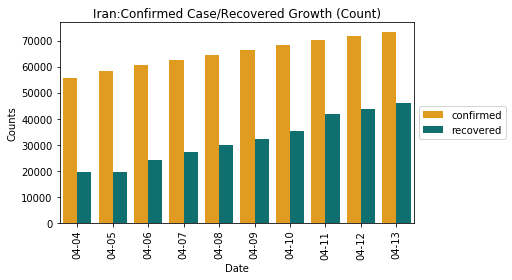

region,Turkey
day,04-13
confirmed,61049 (was:56956)
death,1296 (was:1198)
confirmed_growth,7.19% (was:9.18%)
death_growth,8.18% (was:8.81%)
recovered,3957 (was:3446)


<center><span style="color: green">GREEN</span></center>

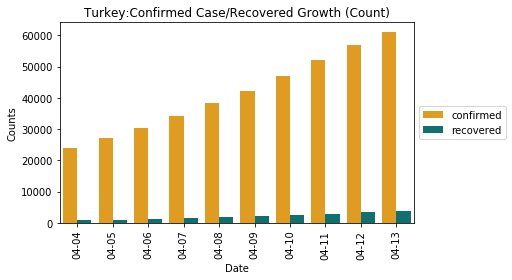

region,Belgium
day,04-13
confirmed,30589 (was:29647)
death,3903 (was:3600)
confirmed_growth,3.18% (was:5.81%)
death_growth,8.42% (was:7.59%)
recovered,6707 (was:6463)


<center><span style="color: orange">ORANGE</span></center>

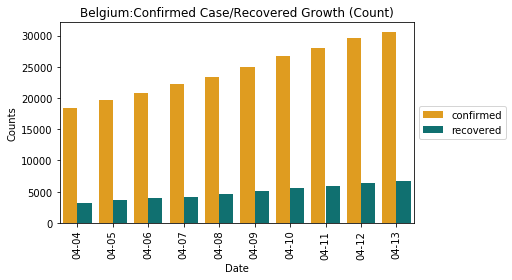

region,Netherlands
day,04-13
confirmed,26710 (was:25746)
death,2833 (was:2747)
confirmed_growth,3.74% (was:4.78%)
death_growth,3.13% (was:3.54%)
recovered,295 (was:295)


<center><span style="color: green">GREEN</span></center>

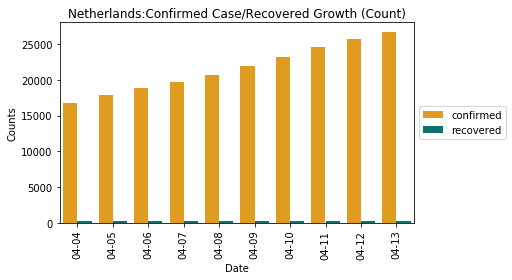

region,Switzerland
day,04-13
confirmed,25688 (was:25415)
death,1138 (was:1106)
confirmed_growth,1.07% (was:1.23%)
death_growth,2.89% (was:6.76%)
recovered,13700 (was:12700)


<center><span style="color: green">GREEN</span></center>

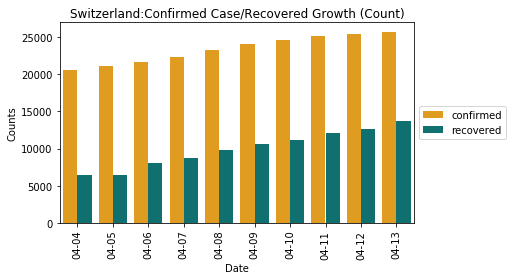

region,Canada
day,04-13
confirmed,25680 (was:24299)
death,780 (was:713)
confirmed_growth,5.68% (was:4.22%)
death_growth,9.40% (was:9.02%)
recovered,7758 (was:7123)


<center><span style="color: red">RED</span></center>

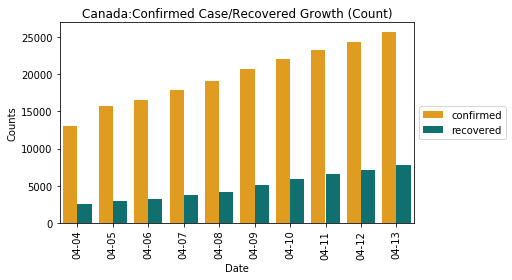

region,Brazil
day,04-13
confirmed,23430 (was:22192)
death,1328 (was:1223)
confirmed_growth,5.58% (was:7.07%)
death_growth,8.59% (was:8.81%)
recovered,173 (was:173)


<center><span style="color: green">GREEN</span></center>

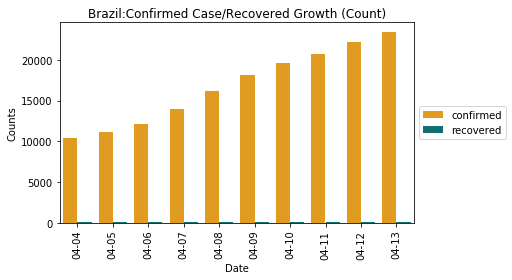

region,Russia
day,04-13
confirmed,18328 (was:15770)
death,148 (was:130)
confirmed_growth,16.22% (was:16.09%)
death_growth,13.85% (was:22.64%)
recovered,1470 (was:1291)


<center><span style="color: red">RED</span></center>

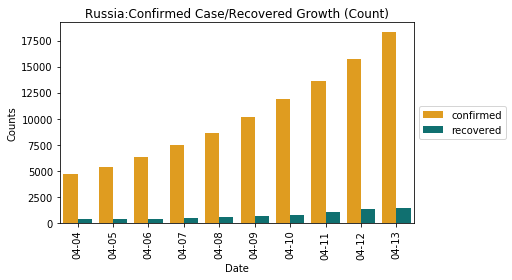

region,Portugal
day,04-13
confirmed,16934 (was:16585)
death,535 (was:504)
confirmed_growth,2.10% (was:3.74%)
death_growth,6.15% (was:7.23%)
recovered,277 (was:277)


<center><span style="color: green">GREEN</span></center>

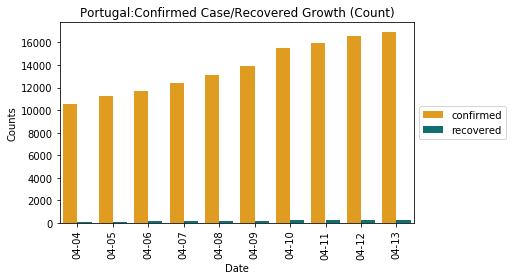

region,Austria
day,04-13
confirmed,14041 (was:13945)
death,368 (was:350)
confirmed_growth,0.69% (was:1.01%)
death_growth,5.14% (was:3.86%)
recovered,7343 (was:6987)


<center><span style="color: orange">ORANGE</span></center>

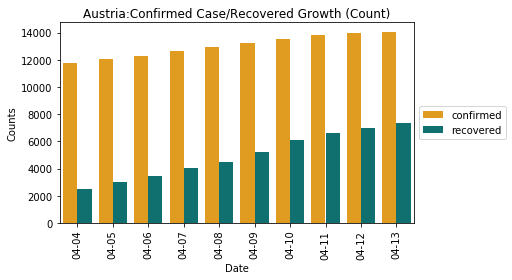

region,Israel
day,04-13
confirmed,11586 (was:11145)
death,116 (was:103)
confirmed_growth,3.96% (was:3.74%)
death_growth,12.62% (was:1.98%)
recovered,1855 (was:1627)


<center><span style="color: red">RED</span></center>

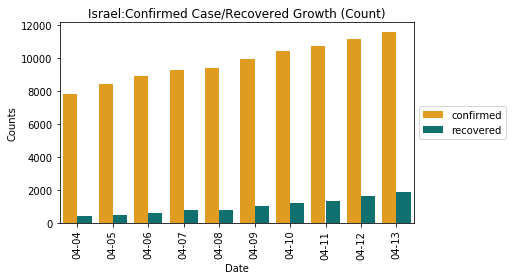

region,Sweden
day,04-13
confirmed,10948 (was:10483)
death,919 (was:899)
confirmed_growth,4.44% (was:3.27%)
death_growth,2.22% (was:1.35%)
recovered,381 (was:381)


<center><span style="color: red">RED</span></center>

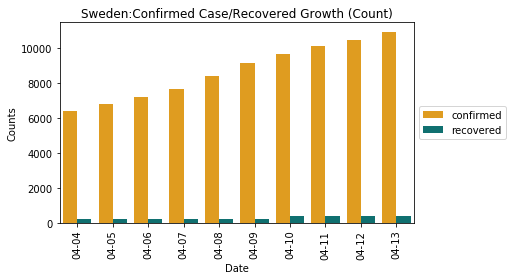

region,Ireland
day,04-13
confirmed,10647 (was:9655)
death,365 (was:334)
confirmed_growth,10.27% (was:8.14%)
death_growth,9.28% (was:4.38%)
recovered,25 (was:25)


<center><span style="color: red">RED</span></center>

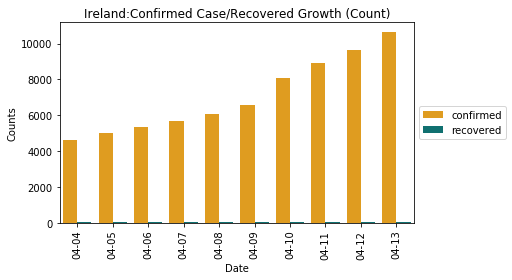

In [8]:
all_run(0)

<h2>US situation on COVID-19</h2>

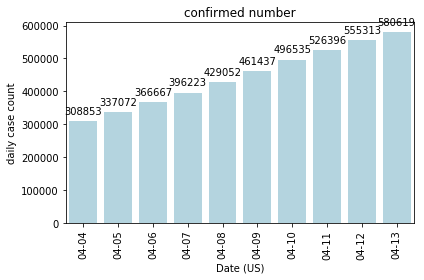

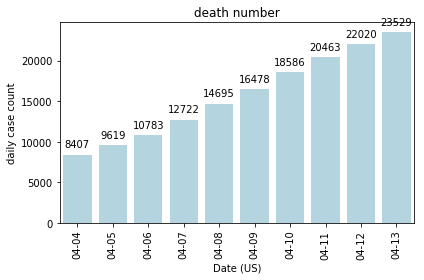

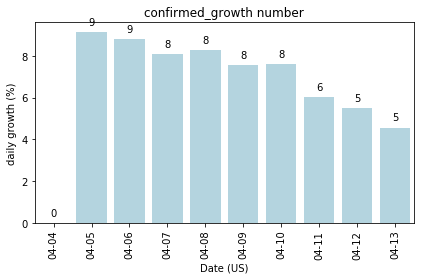

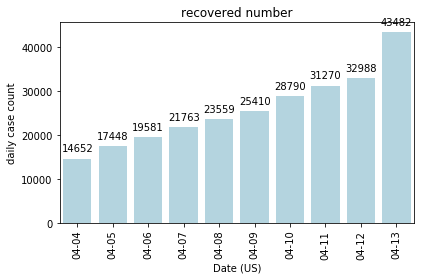

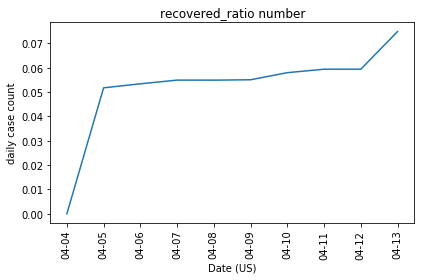

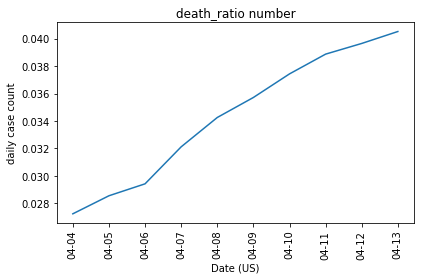

In [9]:
all_run(7)

<h2>US top-20 Most Confirmed Case States on COVID-19</h2>

region,New York
day,04-13
confirmed,195749 (was:189033)
death,10058 (was:9385)
confirmed_growth,3.55% (was:4.42%)
death_growth,7.17% (was:8.79%)


<center><span style="color: green">GREEN</span></center>

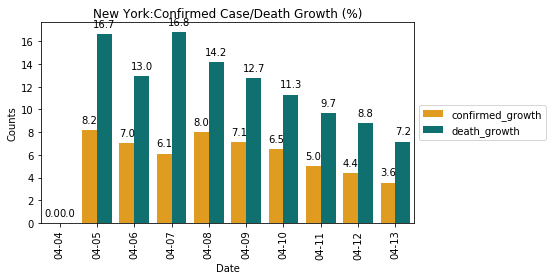

region,New Jersey
day,04-13
confirmed,64584 (was:61850)
death,2443 (was:2350)
confirmed_growth,4.42% (was:6.36%)
death_growth,3.96% (was:7.65%)


<center><span style="color: green">GREEN</span></center>

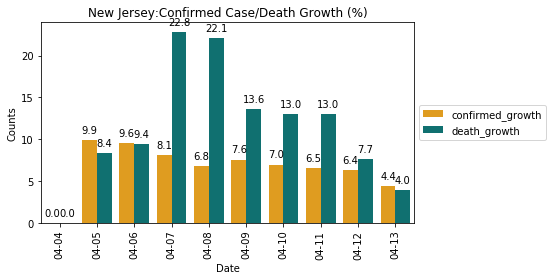

region,Massachusetts
day,04-13
confirmed,26867 (was:25475)
death,844 (was:756)
confirmed_growth,5.46% (was:11.44%)
death_growth,11.64% (was:10.20%)


<center><span style="color: orange">ORANGE</span></center>

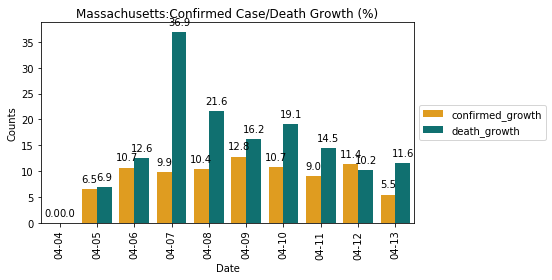

region,Michigan
day,04-13
confirmed,25635 (was:24244)
death,1602 (was:1479)
confirmed_growth,5.74% (was:2.71%)
death_growth,8.32% (was:6.86%)


<center><span style="color: red">RED</span></center>

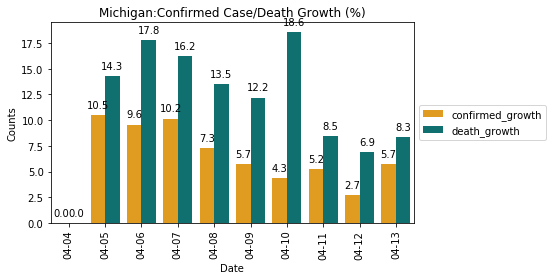

region,Pennsylvania
day,04-13
confirmed,24292 (was:22938)
death,589 (was:557)
confirmed_growth,5.90% (was:5.61%)
death_growth,5.75% (was:10.74%)


<center><span style="color: red">RED</span></center>

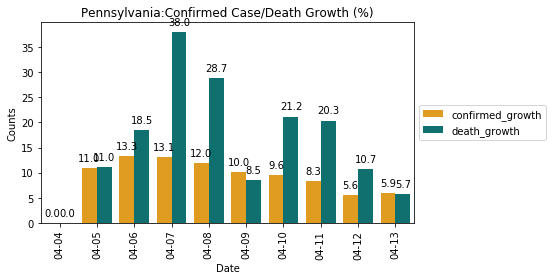

region,California
day,04-13
confirmed,23931 (was:22795)
death,715 (was:641)
confirmed_growth,4.98% (was:5.02%)
death_growth,11.54% (was:5.95%)


<center><span style="color: orange">ORANGE</span></center>

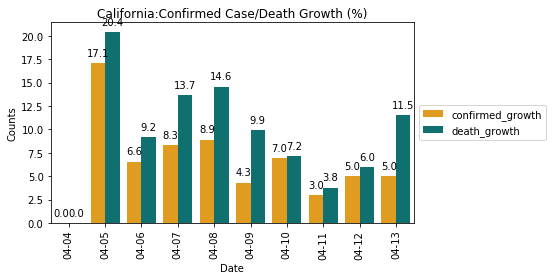

region,Illinois
day,04-13
confirmed,22025 (was:20852)
death,798 (was:720)
confirmed_growth,5.63% (was:8.72%)
death_growth,10.83% (was:6.35%)


<center><span style="color: orange">ORANGE</span></center>

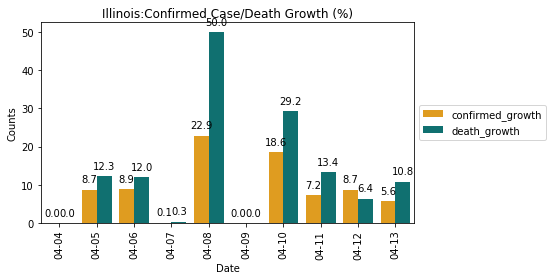

region,Florida
day,04-13
confirmed,21019 (was:19895)
death,499 (was:461)
confirmed_growth,5.65% (was:7.58%)
death_growth,8.24% (was:5.25%)


<center><span style="color: orange">ORANGE</span></center>

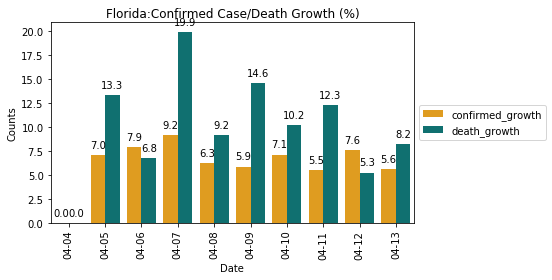

region,Louisiana
day,04-13
confirmed,21016 (was:20595)
death,884 (was:840)
confirmed_growth,2.04% (was:2.90%)
death_growth,5.24% (was:4.22%)


<center><span style="color: orange">ORANGE</span></center>

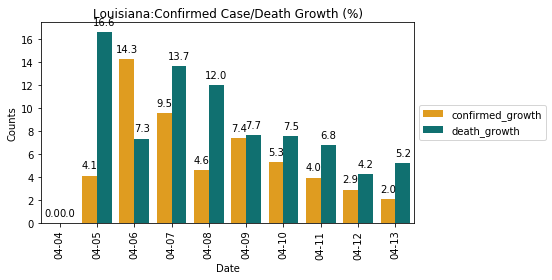

region,Texas
day,04-13
confirmed,14275 (was:13677)
death,305 (was:283)
confirmed_growth,4.37% (was:5.02%)
death_growth,7.77% (was:6.39%)


<center><span style="color: orange">ORANGE</span></center>

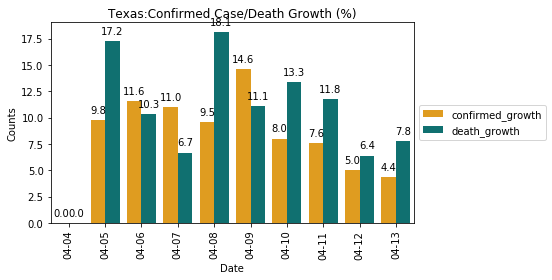

region,Connecticut
day,04-13
confirmed,13381 (was:12035)
death,602 (was:554)
confirmed_growth,11.18% (was:4.56%)
death_growth,8.66% (was:12.15%)


<center><span style="color: red">RED</span></center>

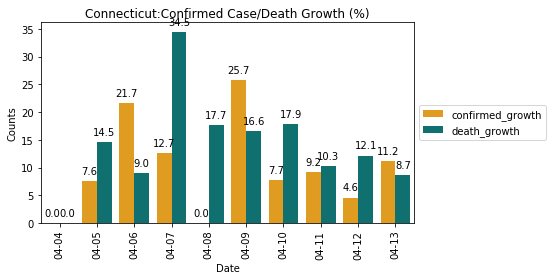

region,Georgia
day,04-13
confirmed,13315 (was:12452)
death,465 (was:433)
confirmed_growth,6.93% (was:2.41%)
death_growth,7.39% (was:0.93%)


<center><span style="color: red">RED</span></center>

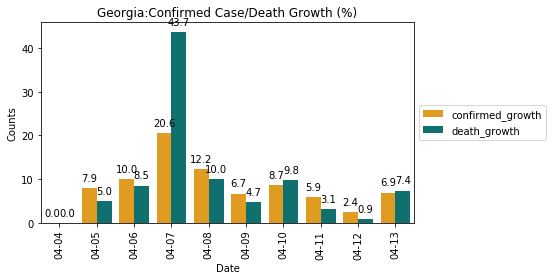

region,Washington
day,04-13
confirmed,10635 (was:10609)
death,513 (was:506)
confirmed_growth,0.25% (was:1.68%)
death_growth,1.38% (was:2.22%)


<center><span style="color: green">GREEN</span></center>

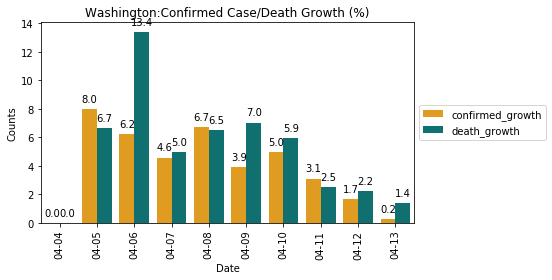

region,Maryland
day,04-13
confirmed,8936 (was:8225)
death,262 (was:236)
confirmed_growth,8.64% (was:6.90%)
death_growth,11.02% (was:14.56%)


<center><span style="color: red">RED</span></center>

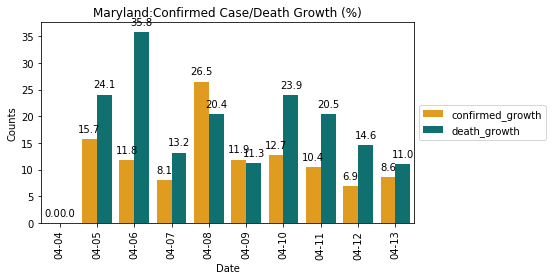

region,Indiana
day,04-13
confirmed,8359 (was:7928)
death,350 (was:343)
confirmed_growth,5.44% (was:6.63%)
death_growth,2.04% (was:3.94%)


<center><span style="color: green">GREEN</span></center>

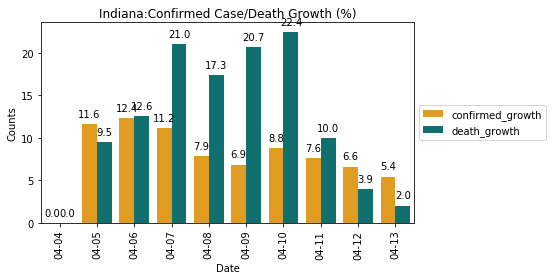

region,Colorado
day,04-13
confirmed,7691 (was:7307)
death,306 (was:289)
confirmed_growth,5.26% (was:12.19%)
death_growth,5.88% (was:15.60%)


<center><span style="color: green">GREEN</span></center>

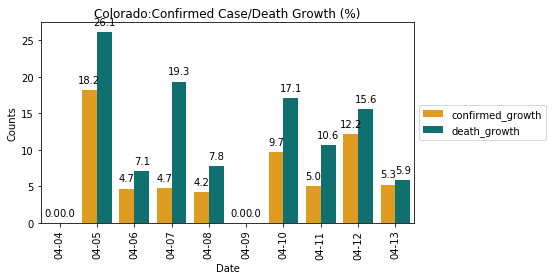

region,Ohio
day,04-13
confirmed,6975 (was:6604)
death,274 (was:253)
confirmed_growth,5.62% (was:5.66%)
death_growth,8.30% (was:2.43%)


<center><span style="color: orange">ORANGE</span></center>

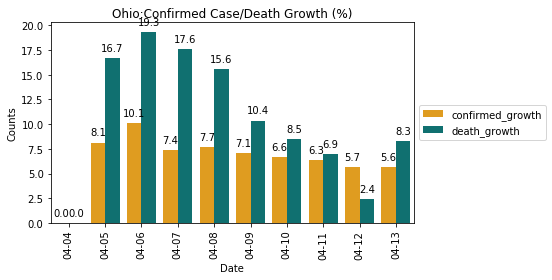

region,Virginia
day,04-13
confirmed,5747 (was:5274)
death,149 (was:141)
confirmed_growth,8.97% (was:3.88%)
death_growth,5.67% (was:8.46%)


<center><span style="color: red">RED</span></center>

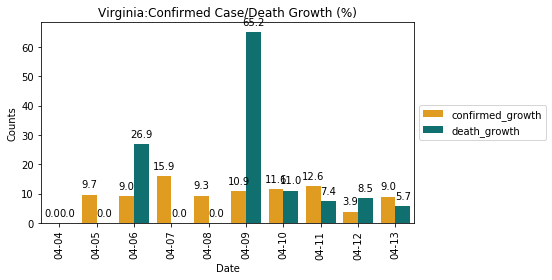

region,Tennessee
day,04-13
confirmed,5610 (was:5508)
death,109 (was:106)
confirmed_growth,1.85% (was:7.33%)
death_growth,2.83% (was:0.00%)


<center><span style="color: orange">ORANGE</span></center>

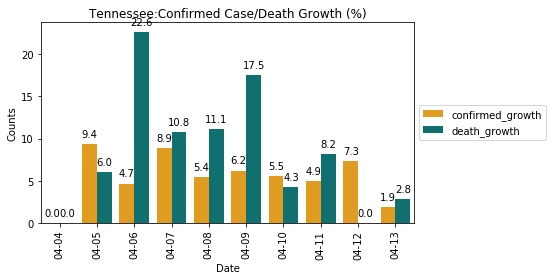

region,North Carolina
day,04-13
confirmed,4886 (was:4570)
death,94 (was:89)
confirmed_growth,6.91% (was:4.96%)
death_growth,5.62% (was:0.00%)


<center><span style="color: red">RED</span></center>

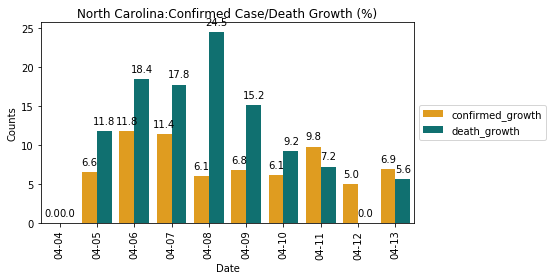

In [10]:
all_run(10)

<h2> Local Interests </h2>


Washington County, Oregon


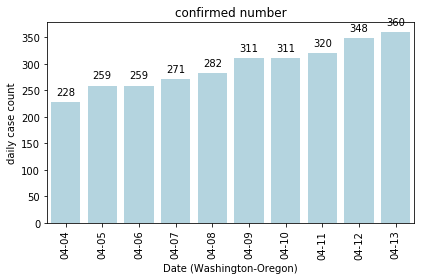

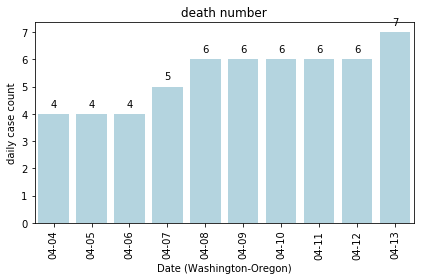

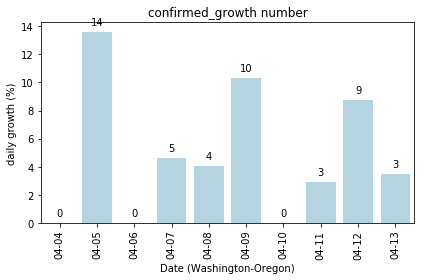

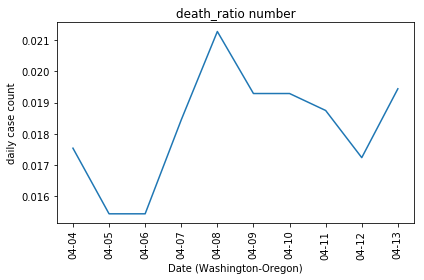

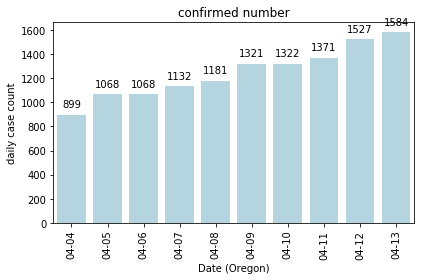

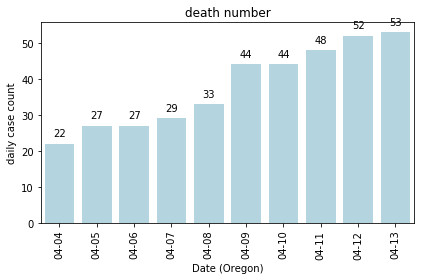

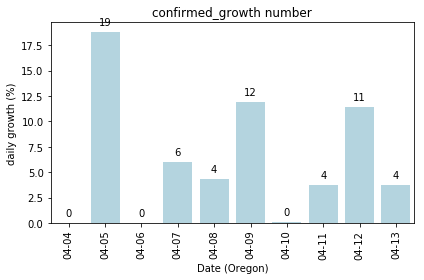

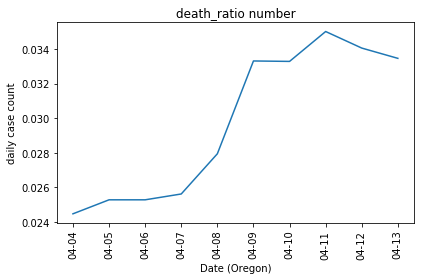

In [11]:
print("Washington County, Oregon")
all_run(2)

Santa Clara, California


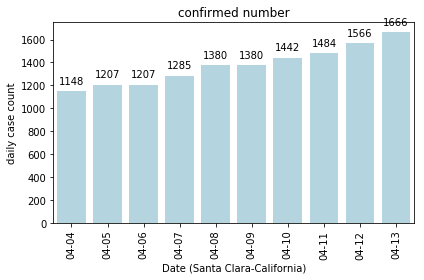

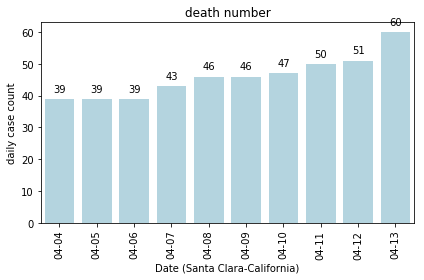

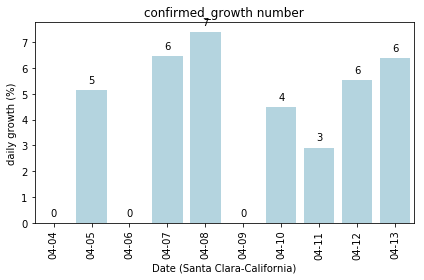

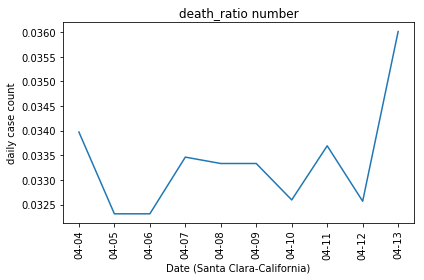

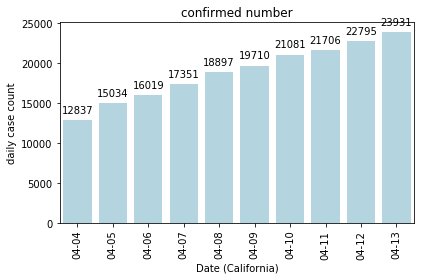

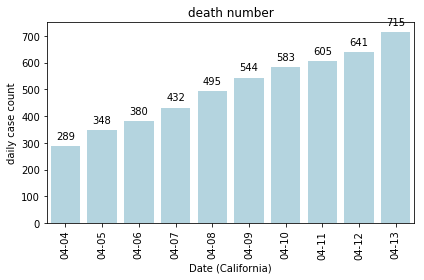

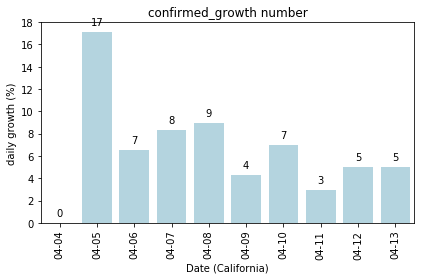

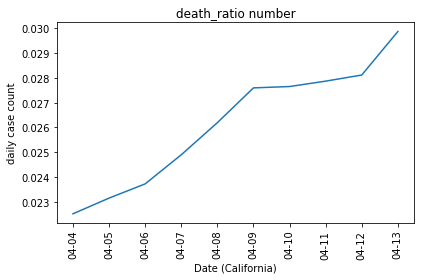

In [12]:
print("Santa Clara, California")
all_run(4)

In [13]:
#<h2> New York </h2>
#all_run(3)

In [14]:
## Testing code


    
def test1():
    df = getCasesByState("03-28-2020", "Oregon")
    sum_confirmed = df["Confirmed"].sum()
    sum_death = df["Deaths"].sum()
    print(sum_confirmed,sum_death)
    display(df.head(500))
    #printList(df)
    
def test2():
    df = getCasesByState("03-27-2020", "Oregon")
    sum_confirmed = df["Confirmed"].sum()
    sum_death = df["Deaths"].sum()
    print(sum_confirmed,sum_death)
    #display(df.head(500))
    #printList(df)
    
def test3():
    df = getCasesByState("03-22-2020", "Oregon")
    sum_confirmed = df["Confirmed"].sum()
    sum_death = df["Deaths"].sum()
    print(sum_confirmed,sum_death)
    #display(df.head(500))
    #printList(df)
    
def test4():
    daylist=["03-22-2020","03-23-2020","03-24-2020","03-25-2020","03-26-2020", "03-27-2020","03-28-2020"]
    df = findTrendSpeedByCounty(daylist, "Washington", "Oregon")
    chart(df, "confirmed")

def test5():
    #findState()
    #findCounty("California")
    day_list = genDayList(7, 1)
 
    df = findTrendSpeedByCounty(day_list, "Los Angeles", "California")
    #chart(df, "confirmed")
    display(df)
    
def test6():
    day_list = genDayList(7, 1)
 
    df1= findTrendSpeedByCounty(day_list, "Washington", "Oregon")
    chart(df1, "confirmed")
    chart(df1, "death")
        
    df = findTrendSpeedByState(day_list, "Oregon")
    chart(df, "confirmed")
    chart(df, "death")
    
    df = findTrendSpeedByCounty(day_list, "Los Angeles", "California")
    chart(df, "confirmed")
    chart(df, "death")
    
    df = findTrendSpeedByCounty(day_list, "Santa Clara", "California")
    chart(df, "confirmed")
    chart(df, "death")
    
    df = findTrendSpeedByState(day_list, "New York")
    chart(df, "confirmed")
    chart(df, "death")
    
    
    
    
    

def test7():
    #findCounty("California")
    #findState()
    findCountry()
    
def test8():
    day_list = genDayList(7, 1)
    df = findTrendSpeedByCountry(day_list, "US")
    chart(df, "confirmed")
    chart(df, "death")
    
def test9():
    day_list = genDayList(7, 1)
    df = findTrendSpeedByCountry(day_list, "US")
    chart(df, "confirmed")
    chart(df, "death")
    linechart(df, "confirmed_growth")
    linechart(df, "death_growth")
    df = findTrendSpeedByState(day_list, "Oregon")
    chart(df, "confirmed")
    chart(df, "death")
    linechart(df, "confirmed_growth")
    linechart(df, "death_growth")   
    df = findTrendSpeedByCounty(day_list, "Washington", "Oregon")
    chart(df, "confirmed")
    chart(df, "death")
    linechart(df, "confirmed_growth")
    linechart(df, "death_growth")   

def test10():
    day_list = genDayList(7, 1)
 
    df1= findTrendByCounty(day_list, "Washington", "Oregon")
    display(df1)
    chart(df1, "confirmed")
    chart(df1, "death")

def testall():
    print("1====================================")
    test10()
    print("2====================================")
    test9()
    print("3====================================")
    test8()
    print("4====================================")
    test6()
    print("5====================================")
    
#test5()


In [15]:
%%sh
#ls -lrt ../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
#more ../csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
#git pull
#more ../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
